# Random Forest
Supanat Jintawatsakoon <br>ID 60119130181 <br>supanat.jtk@g.swu.ac.th

What Random Forest is ?
- Ramdom Forest เป็น Algorithm ที่สร้างขึ้นจาก Decission Tree หลายๆ Decision Tree 
- โดยการสร้าง Decision Tree ก็จะมาจากการ Random เลือก Training Data และ Feature เป็นชุด

How Random Forest work ?
- Random Forest Creation
<img src = "https://lh3.googleusercontent.com/bJnHgsN2_6TeV9coMn8YPKzArz94Kb3s7CW7s7V-XYvXv1cHcR2C5KGjd4QvtNocz7ALQ7qmEl89kaaJCQCscyMDrspFrXch1m-dRyZkoIdW_pFF8ShnRqJ3IeeCJQgkz5pNboO9nrsz30FfqrQaEMYnodyS4vCm2tPU7h1E4lYpHo0f_DxVumec9LYWDOuQBdveWqgjoHl6EAAoN1QZndw4d-w_ra-_EGOcdgfOS907QvcIjClHh7wJYCePVXFoIbUP5kEuSQ-qk8_lhwuMeOcJIIZH1wmCnAZo3kdOdSJcRbmD4u82nny_gzZZKZldHDDf3W-us63HZPgT1RXiKFa3hwzZ1xWPRvToVcMPEDR-F9w1YG9yGdHzPbR5itjuTWQ3-4XIapHj2kKEDcYVi2YcxsO84iIWZncRexz3Uj85jtFia-FgMNSDiyc32ayHcBYaJEGTndy7Q75CPOizjbX3zHTK9B9fUgGlN4wMDQI4LZi501FQNl7Y-FoqG1HJf0V-QM5o6cNXzFiuRMEO01265XTulH1kI8E-dHur-xwg0iwdKSYH_ZtRSnAPN0av3qOgRTGysyZ4W1ctj71-jTW1GUr4M3WrgnYPggRm5Go=w1448-h918-no" width="480">
<br>
ในการสร้าง Random Forest นั้นจะสร้าง Decission Tree ขึ้นมาจาก Trainning Set โดยการสุ่ม sample และ feature เพื่อนำมาสร้าง decision tree และนำไปสร้าง Model สำหรับการ Prediction ต่อไป<br>


- Random Forest Prediction
<img src = "https://lh3.googleusercontent.com/YASxa6DUUPU9mMjOsS0pojmo8fNzFe0HKfaSx4I06nUDan72KNQQwpRiHf6cr_bg2C96pAdSiDqKFeHzG4dTunJVLYxSBip45oIVSrI-PthjuqqYBDozcd_ww0v62P6-OdiN5UPfdpmU8n643-Ca7HJl5Q96lke6DCeTOs1RsssJneamCyvE9Tl8T1UtJT75NyOZdOLUcj1YHUjm9v7mbtjui16Q5lcGXjr5aym2toLn7aKENIVAU_DPJrVZgJ59smEo9N4MyYamInMTulSIQUDWlYBY9biF6vNymNDNXMDW6-Jw3hR87kQkCjbpyd6A2ktzAQV18MZdeWMiVQ0sl_qB07k87dq8gjwNFnphxRX8IIgz_XaA8lCkA40Q17MELtsD4ALj8ZCpKEol53p5dN0SYHCdMVzEV1oRt78wTX_1husvm1959RuVsi7okT5aPMdOjtUXTpiBeXYK8PTdnDzP4r9Y6doaiz2UCj7cG0FB2LBHhd-BjAlZl3tWTBuqss35bC4qVWENii2J8X4tMlyqLBCfRQgJBgtYTMzCi5ZoJIPDFq1GcUciNJ8coIzxME9_yZlRD22qsaBYshpV5gxuuAJ17Nix6aekSVpXFhA=w522-h321-no" width="480">

เมื่อต้องการ predict instance ใหม่ จากภาพจะเห็นได้ว่า Model1 ทำนายออกมาเป็น Class A ในขณะที่ Model2 และ Model3 ทำนายว่าเป็น Class B <br>
ดังนั้น สามารถสรุปได้ว่า instance ใหม่เป็น Class B โดยใช้หลักการ Majority Vote

Why Random Forest
- ใช้ได้ทั้ง classification และ regression
- แก้ปัญหา overfiting ของ decision tree

In [1]:
#!/usr/bin/python

%matplotlib inline
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from time import time
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


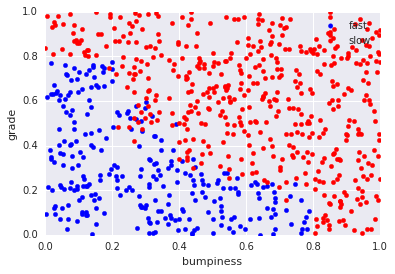

In [4]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import operator

## My Experiments

Using Random Forest with Default Parameter
- n_estimators คือ จำนวน decission tree ทั้งหมดใน forest
- min_samples_split จำนวน sample ต่อ node
- max_depth คือ จำนวนชั้นของ tree ที่จะเกิดขึ้น ค่า defult คือ none หมายความว่า tree จะโตขึ้นเรื่อยๆจนกระทั่ง leaf node เท่ากับ min_samples_split โดยไม่สนค่า depth 

In [6]:
default_n_estimators = 10
default_min_samples_split = 2
default_min_samples_leaf = 1
default_max_depth = None
default_random_state = 1

In [27]:
clf = RandomForestClassifier(n_estimators=default_n_estimators,min_samples_split=default_min_samples_split,
                             max_depth=default_max_depth,criterion=default_criterion,
                             min_samples_leaf=default_min_samples_leaf,random_state=default_random_state)
clf = clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
acc = accuracy_score(pred,labels_test)
print "Accuracy is ",acc," for Default Parameter "

Accuracy is  0.92  for Default Parameter 


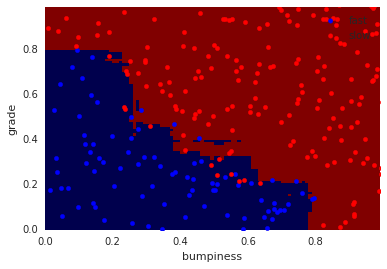

In [28]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

## Tuning Parameters

### ทดสอบค่าของพารามิเตอร์ n_estimators ในช่วง 1-200

In [75]:
def test_n_estimators(n_estimators):
    t0 = time()
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                             min_samples_split = default_min_samples_split , criterion='entropy',
                                 min_samples_leaf = default_min_samples_leaf, random_state=1)
    clf = clf.fit(features_train, labels_train) 
    t1 = time()
    t = round(t1 - t0,3)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred,labels_test)
    return [acc,t]



In [ ]:
n_list = range(1,100)
acc_list = []
time_list = []
for i in n_list:
    result = test_n_estimators(i)
    acc_list.append(result[0])
    time_list.append(result[1])

acc_n_estimators = acc_list


Max Accuracy is  0.92 with n_estimator is  13 and calculation time is  0.063  sec


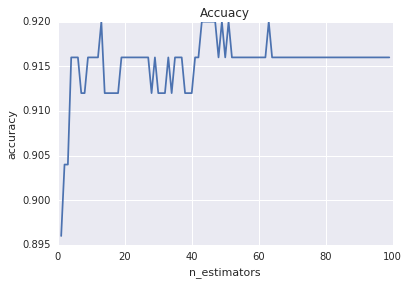

In [64]:
plt.plot(n_list,acc_list)
#plt.ylim(min(acc_list), 0.93)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with n_estimator is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

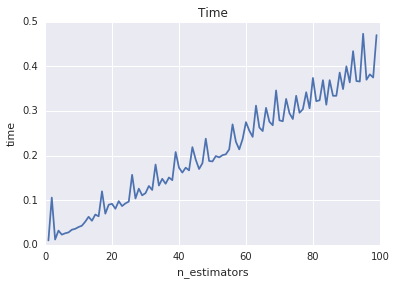

In [65]:
plt.plot(n_list,time_list)
plt.xlabel('n_estimators')
plt.ylabel('time')
plt.title('Time')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))

*n_estimators=n_estimators,min_samples_split=58, criterion='entropy', random_state=1*

### ทดสอบค่าของพารามิเตอร์ min_samles_split ในช่วง 2-100

In [78]:
def test_min_samles_split(min_samples_split):
    t0 = time()
    clf = RandomForestClassifier(n_estimators=default_n_estimators, 
                             min_samples_split = min_samples_split , criterion='entropy',
                                 min_samples_leaf = default_min_samples_leaf, random_state=1)
    clf = clf.fit(features_train, labels_train) 
    t1 = time()
    t = round(t1 - t0,3)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred,labels_test)
    return [acc,t]


In [ ]:
n_list = range(2,100)
acc_list = []
time_list = []
for i in n_list:
    result = test_min_samles_split(i)
    acc_list.append(result[0])
    time_list.append(result[1])
acc_min_samples_split = acc_list


Max Accuracy is  0.94 with min_samles_split is  58 and calculation time is  0.038  sec


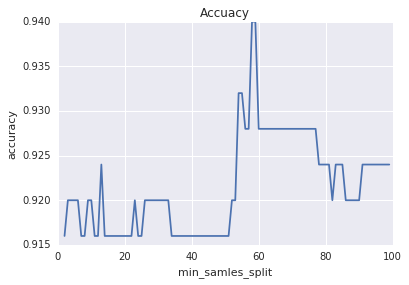

In [68]:
plt.plot(n_list,acc_list)
plt.xlabel('min_samles_split')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with min_samles_split is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

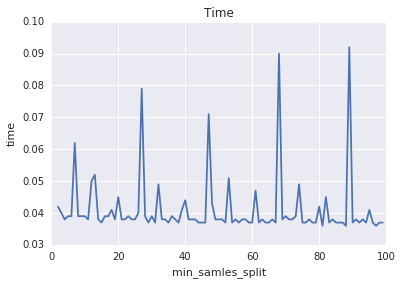

In [69]:
plt.plot(n_list,time_list)
plt.xlabel('min_samles_split')
plt.ylabel('time')
plt.title('Time')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))

### ทดสอบค่าของพารามิเตอร์ default_min_samples_leaf ในช่วง 1-100

In [34]:
def test_min_samles_split(min_samples_leaf):
    t0 = time()
    clf = RandomForestClassifier(n_estimators=default_n_estimators, 
                             min_samples_split = default_min_samples_split , criterion='entropy',
                                 min_samples_leaf = min_samples_leaf, random_state=1)

    clf = clf.fit(features_train, labels_train) 
    t1 = time()
    t = round(t1 - t0,3)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred,labels_test)
    return [acc,t]

n_list = range(1,100)
acc_list = []
time_list = []
for i in n_list:
    result = test_min_samles_split(i)
    acc_list.append(result[0])
    time_list.append(result[1])
acc_min_samples_leaf = acc_list


Max Accuracy is  0.932 with min_samples_leaf is  43 and calculation time is  0.039  sec


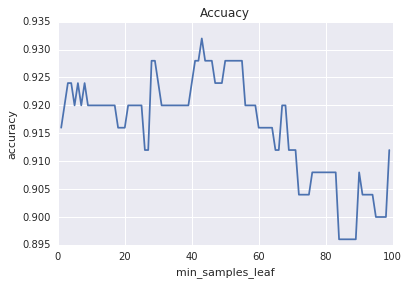

In [35]:
plt.plot(n_list,acc_list)
#plt.ylim(min(acc_list), 0.93)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with min_samples_leaf is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

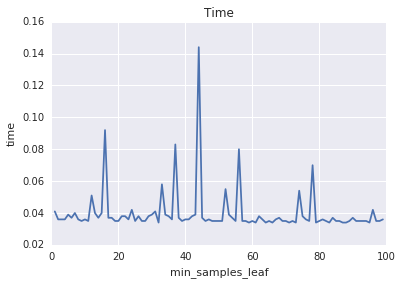

In [36]:
plt.plot(n_list,time_list)
plt.xlabel('min_samples_leaf')
plt.ylabel('time')
plt.title('Time')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))

## ทดสอบค่าของพารามิเตอร์ max_depth

In [14]:
def test_max_depth(max_depth):
    t0 = time()
    clf = RandomForestClassifier(n_estimators=default_n_estimators,max_depth = max_depth,
                             min_samples_split = default_min_samples_split , criterion='entropy',
                                 min_samples_leaf = default_min_samples_leaf, random_state=1)

    clf = clf.fit(features_train, labels_train) 
    t1 = time()
    t = round(t1 - t0,3)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred,labels_test)
    return [acc,t]

n_list = range(1,50)
acc_list = []
time_list = []
for i in n_list:
    result = test_max_depth(i)
    acc_list.append(result[0])
    time_list.append(result[1])
acc_max_depth = acc_list


Max Accuracy is  0.928 with max_depth is  3 and calculation time is  0.039  sec


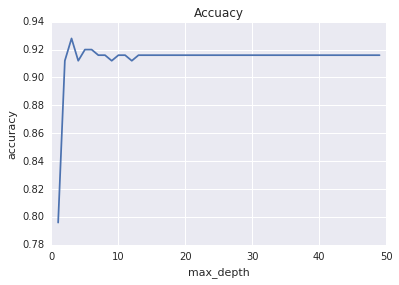

In [16]:
plt.plot(n_list,acc_list)
#plt.ylim(min(acc_list), 0.93)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with max_depth is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

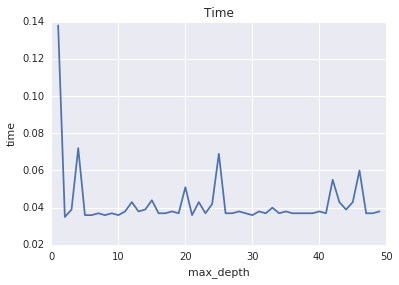

In [18]:
plt.plot(n_list,time_list)
plt.xlabel('max_depth')
plt.ylabel('time')
plt.title('Time')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))

## ทดสอบค่าของพารามิเตอร์ Random State

In [7]:
def test_max_depth(random_state):
    t0 = time()
    clf = RandomForestClassifier(n_estimators=default_n_estimators,
                             min_samples_split = default_min_samples_split , criterion='entropy',
                                 min_samples_leaf = default_min_samples_leaf, random_state=random_state)

    clf = clf.fit(features_train, labels_train) 
    t1 = time()
    t = round(t1 - t0,3)
    pred = clf.predict(features_test)
    acc = accuracy_score(pred,labels_test)
    return [acc,t]

n_list = range(1,4000)
acc_list = []
time_list = []
for i in n_list:
    result = test_max_depth(i)
    acc_list.append(result[0])
    time_list.append(result[1])
acc_max_depth = acc_list


Max Accuracy is  0.94 with random_state is  346 and calculation time is  0.029  sec


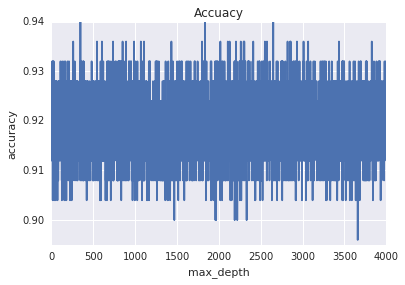

In [9]:
plt.plot(n_list,acc_list)
#plt.ylim(min(acc_list), 0.93)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with random_state is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

## Increse Sample Size

In [73]:
features_train, labels_train, features_test, labels_test = makeTerrainData(5000)
len(features_train)

3750

n_estimator

In [76]:
n_list = range(1,100)
acc_list = []
time_list = []
for i in n_list:
    result = test_n_estimators(i)
    acc_list.append(result[0])
    time_list.append(result[1])

acc_n_estimators = acc_list


Max Accuracy is  0.9632 with n_estimator is  17 and calculation time is  0.104  sec


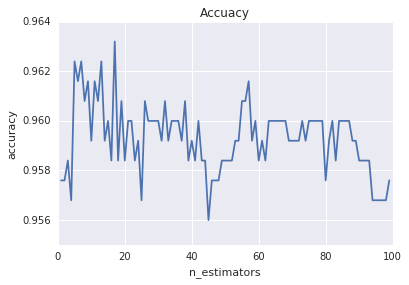

In [77]:
plt.plot(n_list,acc_list)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with n_estimator is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

In [79]:
n_list = range(2,100)
acc_list = []
time_list = []
for i in n_list:
    result = test_min_samles_split(i)
    acc_list.append(result[0])
    time_list.append(result[1])
acc_min_samples_split = acc_list


Max Accuracy is  0.96 with min_samles_split is  10 and calculation time is  0.064  sec


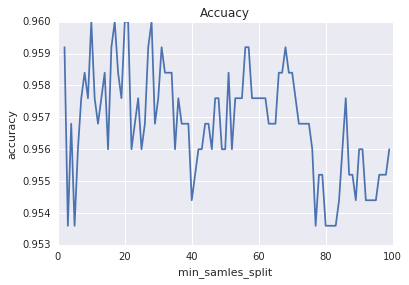

In [80]:
plt.plot(n_list,acc_list)
plt.xlabel('min_samles_split')
plt.ylabel('accuracy')
plt.title('Accuacy')
index, value = max(enumerate(acc_list), key=operator.itemgetter(1))
print "\nMax Accuracy is ",value,"with min_samles_split is ",n_list[index] , "and calculation time is ",time_list[index] ," sec"

## Beat Udacity

In [63]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
clf_rf = RandomForestClassifier(n_estimators=8,min_samples_split = 58 
                             , criterion='entropy', random_state=1)
t0 = time()
clf_rf = clf_rf.fit(features_train, labels_train) 
t1 = time()
rf_training_time = round(t1 - t0,3)

t0 = time()
t1 = time()
pred = clf_rf.predict(features_test)
rf_prediction_time = round(t1 - t0,3)
rf_acc = accuracy_score(pred,labels_test)
print "Accuracy is ",acc*100 ,"%\nTraining Time " ,rf_training_time , "\nPrediction time is ",rf_prediction_time

Accuracy is  94.0 %
Training Time  0.035 
Prediction time is  0.0


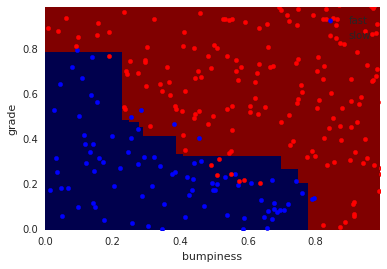

In [33]:
try:
    prettyPicture(clf_rf, features_test, labels_test)
except NameError:
    pass

In [ ]:
|         | Accuracy           | Training Time  | Prediction Time  |
| ------------- |:-------------:| -----:| -----:|
| My Experiments |  94.0 %   | 0.032 sec | 0.0 sec|
| Udacity |  93.6 %   |  | |

## SVM

In [56]:
clf_SVM = SVC(kernel="rbf")

In [57]:
t0 = time()
clf_SVM.fit(features_train,labels_train)
t1 = time()
svm_training_time = round(t1 - t0,3)

In [60]:
t0 = time()
pred = clf_SVM.predict(features_test)
t1 = time()
svm_prediction_time  = round(t1 - t0,3)
svm_acc = accuracy_score(pred, labels_test)
print "Accuracy is ",svm_acc*100 ,"%\nTraining Time " ,svm_training_time , "\nPrediction time is ",svm_prediction_time

Accuracy is  92.0 %
Training Time  0.021 
Prediction time is  0.008


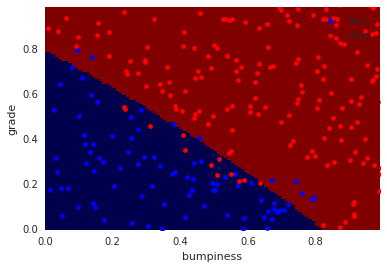

In [70]:
try:
    prettyPicture(clf_SVM, features_test, labels_test)
except NameError:
    pass

### Compare Random Forest with SVM

| Algorithms        | Accuracy           | Training Time  | Prediction Time  |
| ------------- |:-------------:| -----:| -----:|
| Random Forest (Tuned Parameter) |  94.0 %   | 0.032 sec | 0.0 sec|
| SVM |  92.0 %   | 0.021 sec | 0.008 sec|

## สรุป
- จากการทดลองปรับค่า Parameter ของ Random Forest จะเห็นได้ว่า parameter ที่ส่งผลให้ accuracy เพิ่มขึ้น n_estimator , min_samples_split และ random_state 
- เมื่อเพิ่ม sample ส่งผลให้ accuracy เพิ่มขึ้น

## Additional Experiments

Hyperparameter Estimation with Grid Search

In [8]:
depth_range = range(1,10)
n_estimators_range = range(1,10)
min_samples_split_range = [2,100]
param_grid = dict(max_depth=depth_range,n_estimators=n_estimators_range,min_samples_split = min_samples_split_range)

rf = RandomForestClassifier(random_state=1)
clf = GridSearchCV(rf, param_grid)
clf.fit(features_train, labels_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 100], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
clf.grid_scores_

[mean: 0.74667, std: 0.03224, params: {'min_samples_split': 2, 'n_estimators': 1, 'max_depth': 1},
 mean: 0.80667, std: 0.00699, params: {'min_samples_split': 2, 'n_estimators': 2, 'max_depth': 1},
 mean: 0.74133, std: 0.02324, params: {'min_samples_split': 2, 'n_estimators': 3, 'max_depth': 1},
 mean: 0.80800, std: 0.00511, params: {'min_samples_split': 2, 'n_estimators': 4, 'max_depth': 1},
 mean: 0.78000, std: 0.01984, params: {'min_samples_split': 2, 'n_estimators': 5, 'max_depth': 1},
 mean: 0.78667, std: 0.01950, params: {'min_samples_split': 2, 'n_estimators': 6, 'max_depth': 1},
 mean: 0.78000, std: 0.01984, params: {'min_samples_split': 2, 'n_estimators': 7, 'max_depth': 1},
 mean: 0.79867, std: 0.02127, params: {'min_samples_split': 2, 'n_estimators': 8, 'max_depth': 1},
 mean: 0.80933, std: 0.01402, params: {'min_samples_split': 2, 'n_estimators': 9, 'max_depth': 1},
 mean: 0.74667, std: 0.03224, params: {'min_samples_split': 100, 'n_estimators': 1, 'max_depth': 1},
 mean: 0

In [10]:
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.954666666667
{'min_samples_split': 100, 'n_estimators': 2, 'max_depth': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)


Test Parameter

In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)
clf = clf.fit(features_train, labels_train) 
pred = clf.predict(features_test)
acc = accuracy_score(pred,labels_test)
print "Accuracy is ",acc*100 ," %"

Accuracy is  90.4  %
